# Ayala Morales Mauricio
### No. de cuenta: 315332122

---

# 3. Propiedades estadísticas del lenguaje natural

### Práctica 3: Stop! stop! 🚏 My Zipf's distribution can talk!!! 🙀

**Fecha de entrega: Sábado 05 de Septiembre 2024 - 11:59pm**


### Instalación de dependencias

In [ ]:
%pip install wordcloud

### Importación de módulos y bibliotecas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

- Comprobar si las *stopwords* que encontramos en paqueterias de *NLP* coinciden con las palabras más comúnes obtenidas en Zipf
    - Utilizar el [corpus CREA](https://corpus.rae.es/frec/CREA_total.zip)
    - Realizar una nube de palabras usando las stopwords de paqueteria y las obtenidas através de Zipf
    - Responder las siguientes preguntas:
        - ¿Obtenemos el mismo resultado? Si o no y ¿Porqué?

Utilizando la paquetería _NLTK_ para realizar la comparación:

In [3]:
# Downloading Spanish stopwords from NLTK.
nltk.download('stopwords')
stopwords: list[str] = list(stopwords.words('spanish'))
print('Stopwords NLTK: ', len(stopwords))

Stopwords NLTK:  313


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mauricio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Creating a dictionary with the stopwords and its pseudo-frequency.
stopwords_nltk = {}
for i in range(len(stopwords)):
    stopwords_nltk[stopwords[i]] = len(stopwords) - i


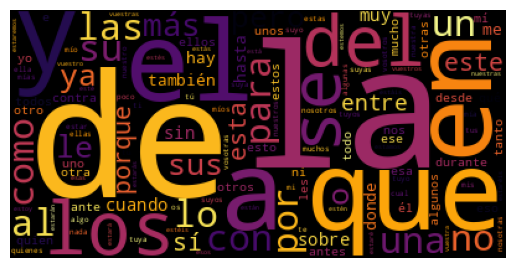

In [7]:
# Creating and showing a WordCloud using NLTK's stopwords
wc_nltk = WordCloud(colormap='inferno', stopwords=None).generate_from_frequencies(stopwords_nltk)
plt.imshow(wc_nltk)
plt.axis("off")
plt.show()

In [8]:
# Reading the corpus frequencies file.
corpus_freqs = pd.read_csv('CREA_total.TXT', skiprows=1,
                           names=['rank', 'word', 'absFrequency', 'normFrequency'],
                           delimiter='\t', encoding="latin-1")
corpus_freqs.head(6)

/tmp/ipykernel_3269/1433507885.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  corpus_freqs = pd.read_csv('CREA_total.TXT', skiprows=1,


,rank,word,absFrequency,normFrequency
0,1.0,de,"9,999,518",65545.55
1,2.0,la,"6,277,560",41148.59
2,3.0,que,"4,681,839",30688.85
3,4.0,el,"4,569,652",29953.48
4,5.0,en,"4,234,281",27755.16
5,6.0,y,"4,180,279",27401.19


In [9]:
# Extracting the 313 most frequent stopwords from the CREA corpus.
stopwords_CREA = {}
for i in range(len(stopwords)):
    stopwords_CREA[corpus_freqs['word'][i]] = float(corpus_freqs['normFrequency'][i])


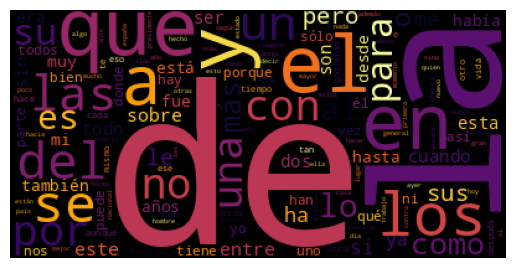

In [10]:
# Creating and showing a WordCloud using CREA's stopwords.
wc_CREA = WordCloud(colormap='inferno', stopwords=None).generate_from_frequencies(stopwords_CREA)
plt.imshow(wc_CREA)
plt.axis("off")
plt.show()

In [11]:
# Displaying the stopwords from nltk and CREA.
print(stopwords_nltk.keys())
print(stopwords_CREA.keys())

dict_keys(['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', '

Se puede observar que las imagenes generadas por la paquetería y el corpus CREA son bastante similares. Como se muestra en la anterior celda, casi todas las stopwords tienen la misma posición en ambos conjuntos, a excepción de alguna pocas como "del" y "se", o "por" y  "un", sin embargo solo difieren en una posición. Por lo tanto se puede confirmar que las _stopwords_ de la paquetería _NLTK_ sí coinciden con las palabras más comunes obtenidas en Zipf.